# COMP1801 - Machine Learning Coursework Solution

Let’s start by importing the essential Python libraries for data analysis and machine learning.

In [28]:
# Import libraries
try:
    import glob
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

except Exception as e:
    print(f"Error : {e}")

In [29]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

# Now df contains the data from the single CSV file

Found file: ../Datasets/COMP1801_Coursework_Dataset.csv
Loaded dataset: ../Datasets/COMP1801_Coursework_Dataset.csv


### Code Explanation

`glob.glob(data_path)` returns a list of file paths matching the pattern `'Datasets/*.csv'`. The code checks if there is exactly one file in the list. If there is exactly one file, it reads the CSV file into a DataFrame. If there are no files or more than one file, it raises an error. This approach ensures that you can dynamically find and read the single CSV file in the `Datasets` directory without needing to specify the filename manually.



In [30]:
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB


In [32]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


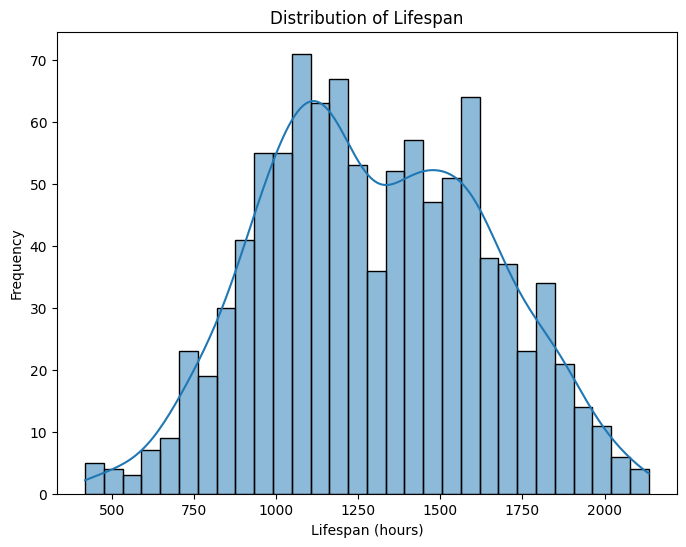

In [33]:
# Plotting the distribution of 'Lifespan'
plt.figure(figsize=(8, 6))
sns.histplot(df['Lifespan'], bins=30, kde=True)
plt.title('Distribution of Lifespan')
plt.xlabel('Lifespan (hours)')
plt.ylabel('Frequency')
plt.show()

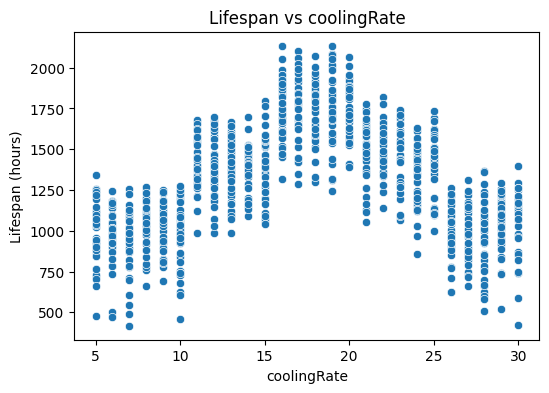

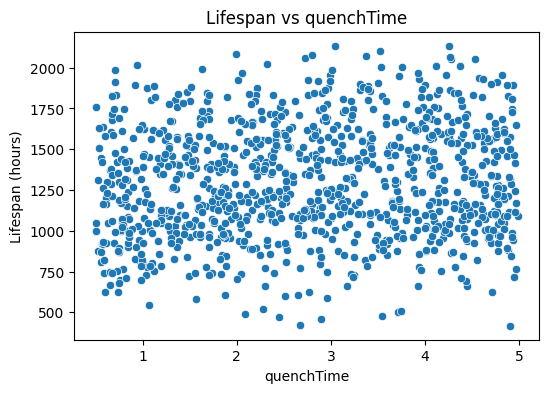

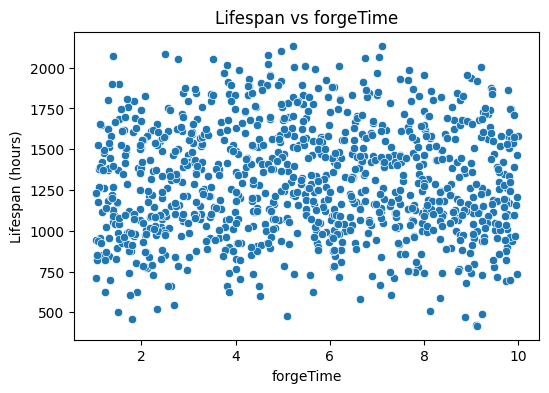

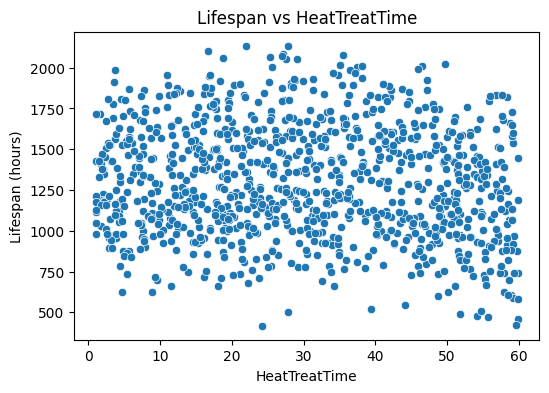

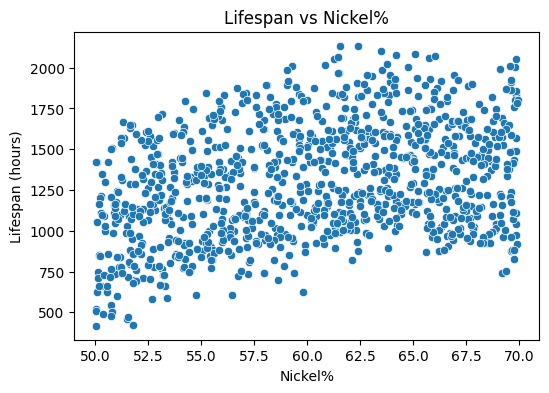

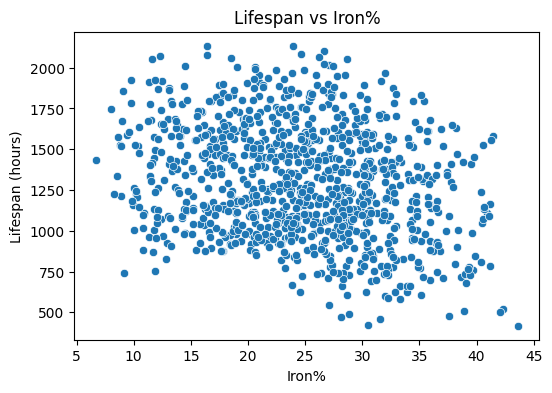

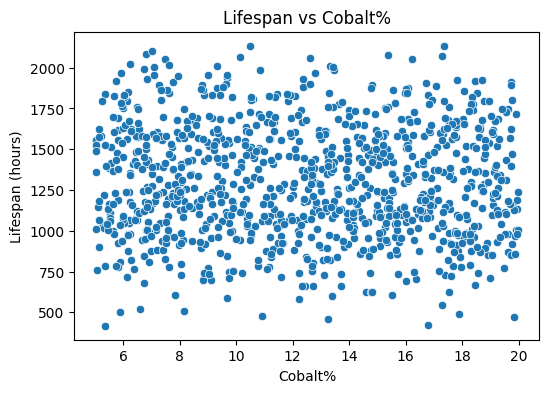

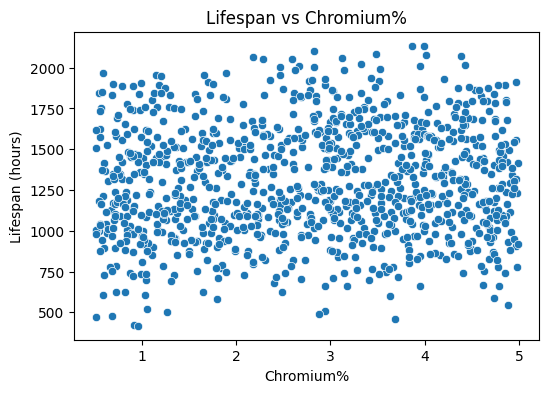

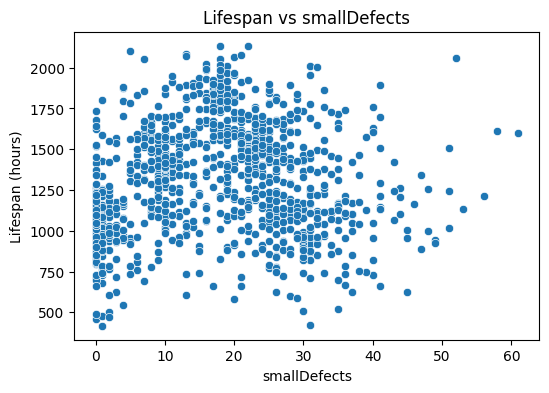

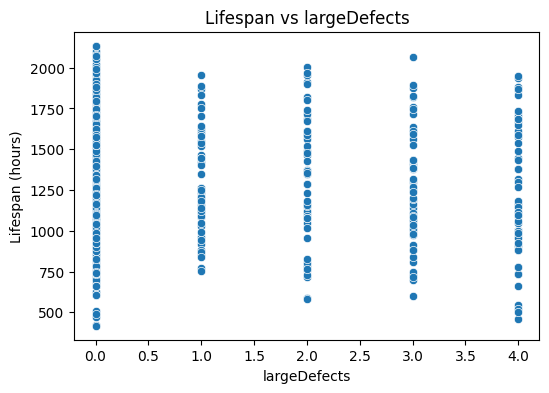

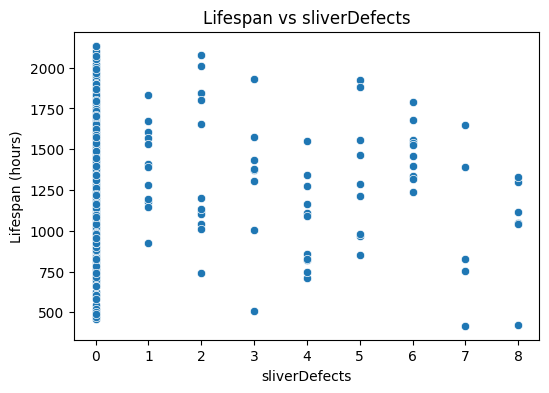

In [34]:
# List of numerical columns excluding 'Lifespan'
numerical_cols = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
                  'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%',
                  'smallDefects', 'largeDefects', 'sliverDefects']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Lifespan')
    plt.title(f'Lifespan vs {col}')
    plt.xlabel(col)
    plt.ylabel('Lifespan (hours)')
    plt.show()

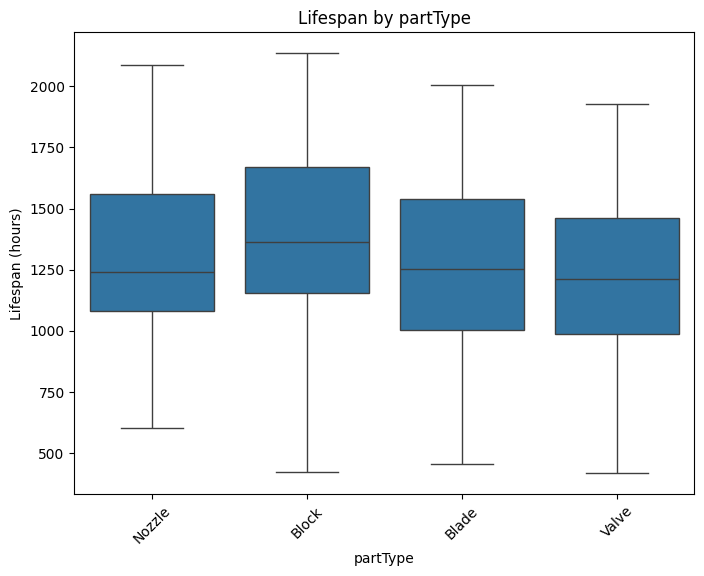

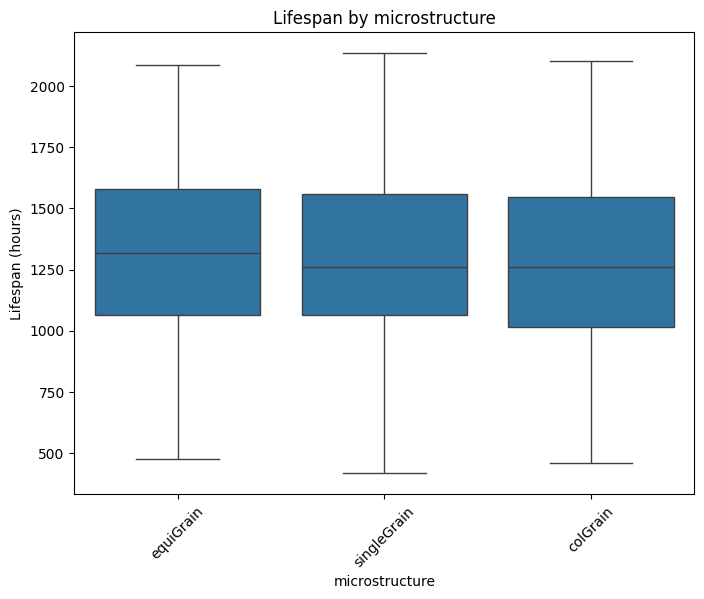

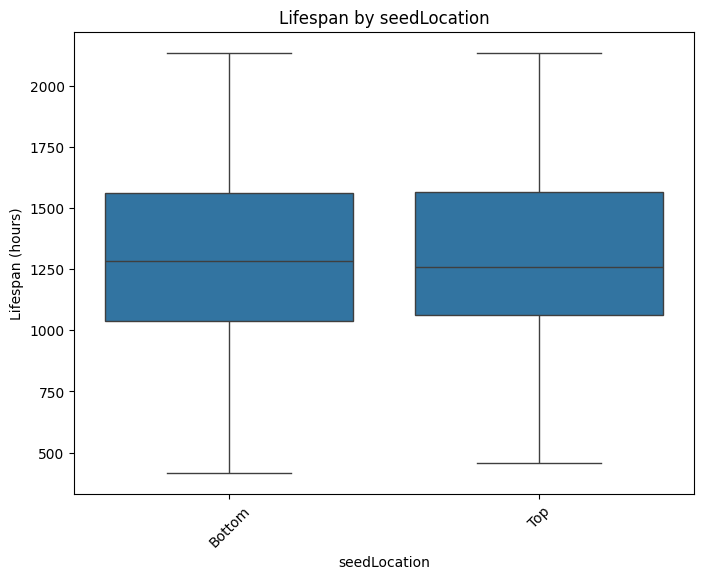

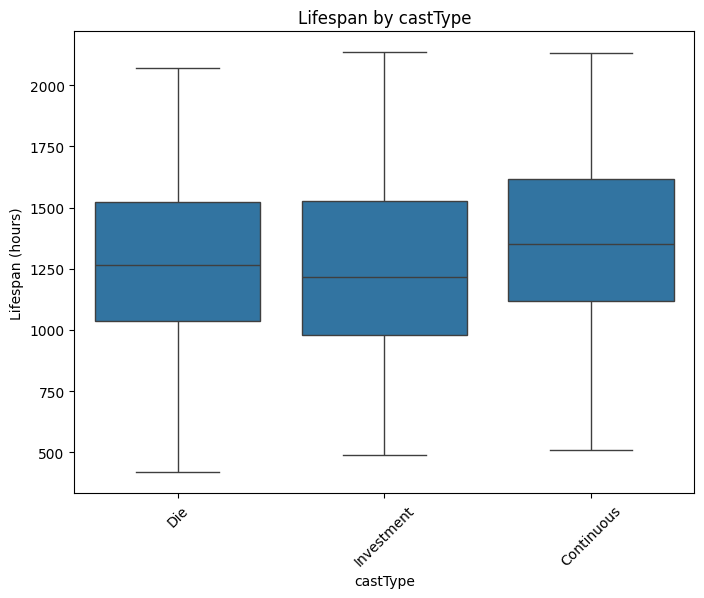

In [35]:
categorical_cols = ['partType', 'microstructure', 'seedLocation', 'castType']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Lifespan', data=df)
    plt.title(f'Lifespan by {col}')
    plt.xlabel(col)
    plt.ylabel('Lifespan (hours)')
    plt.xticks(rotation=45)
    plt.show()

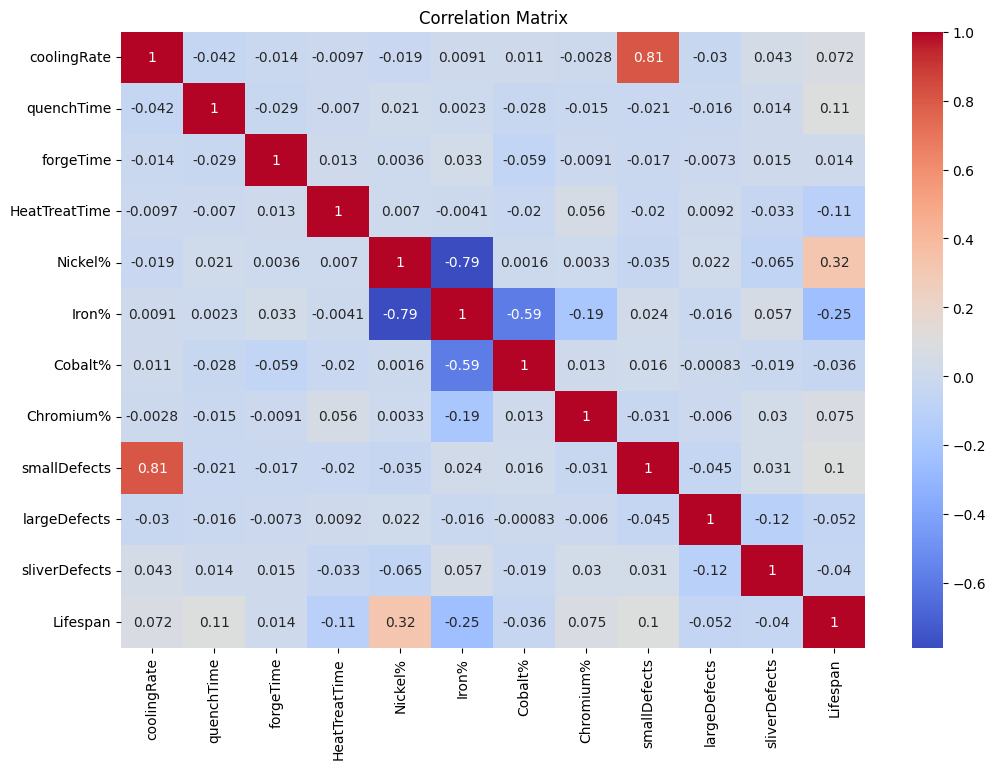

In [36]:
# Include 'Lifespan' in the correlation matrix
numerical_cols_with_target = numerical_cols + ['Lifespan']
corr_matrix = df[numerical_cols_with_target].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Check for missing values
df.isnull().sum()

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
HeatTreatTime     0
Nickel%           0
Iron%             0
Cobalt%           0
Chromium%         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

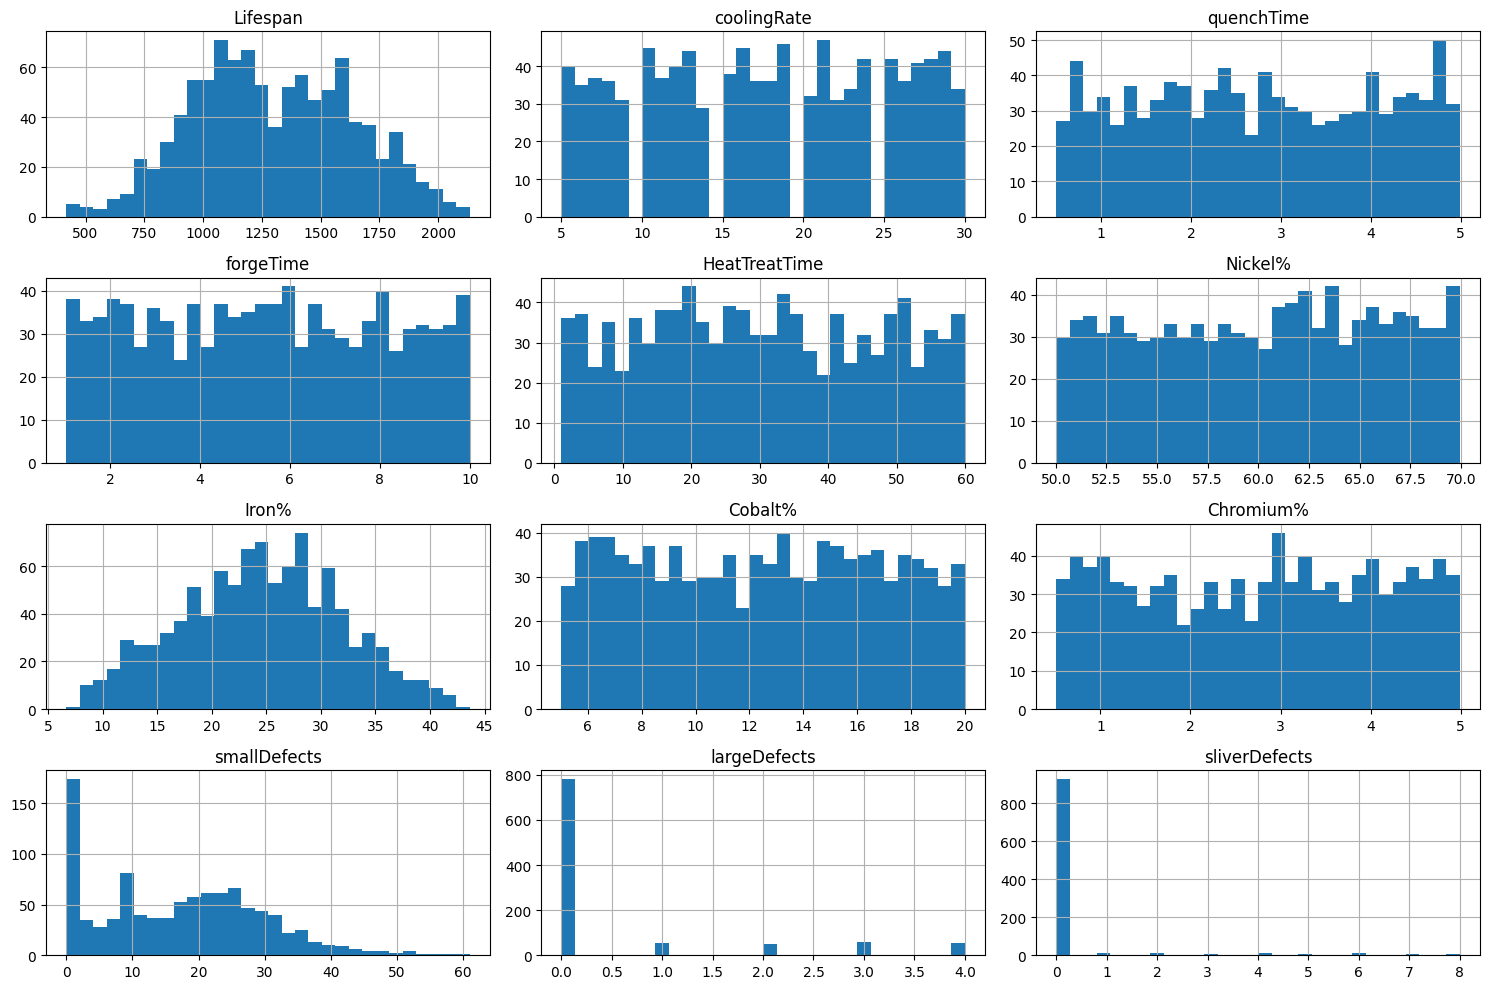

In [38]:
# List of numerical columns to plot
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

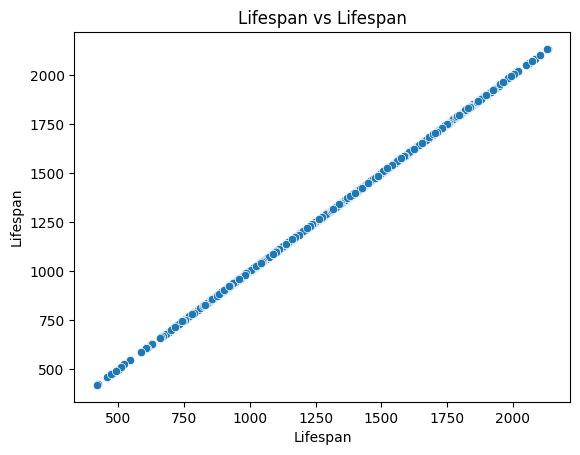

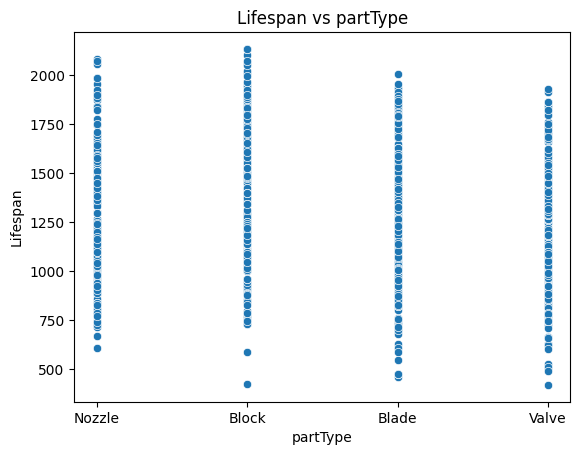

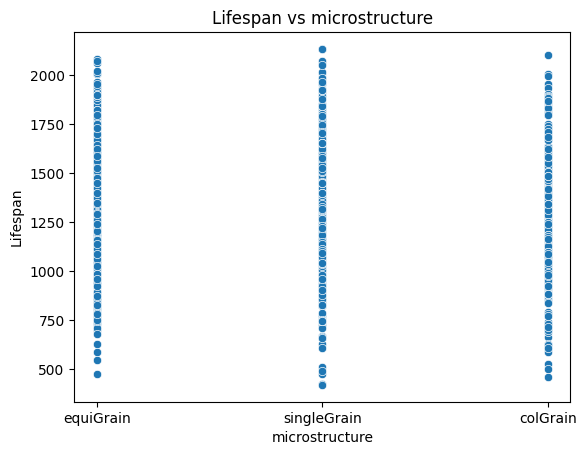

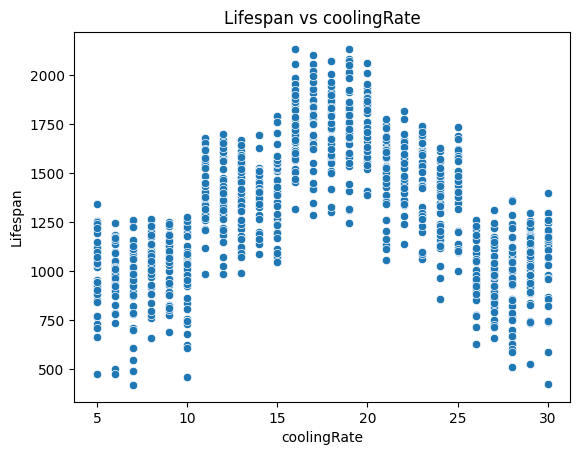

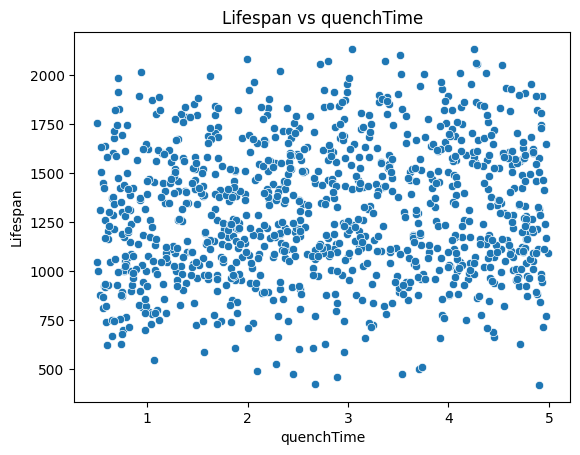

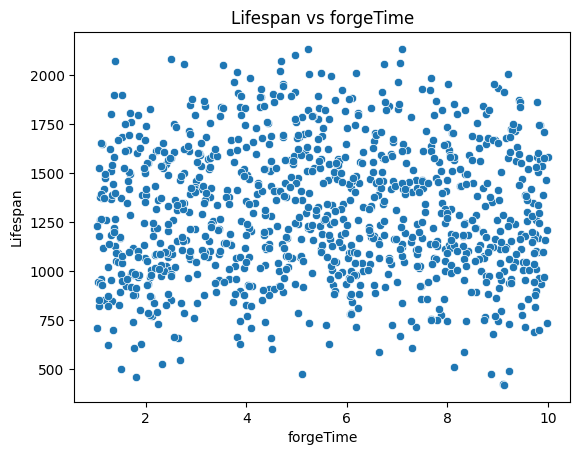

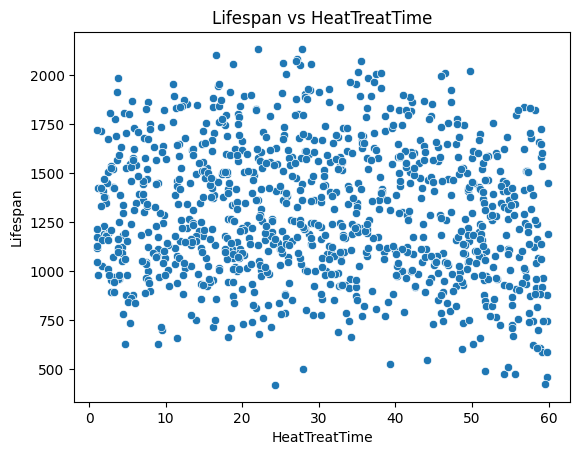

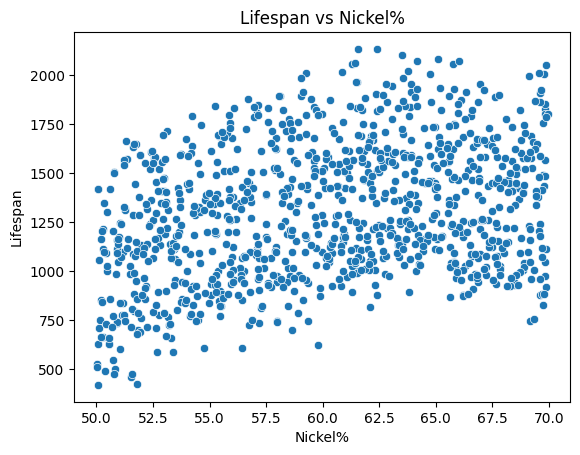

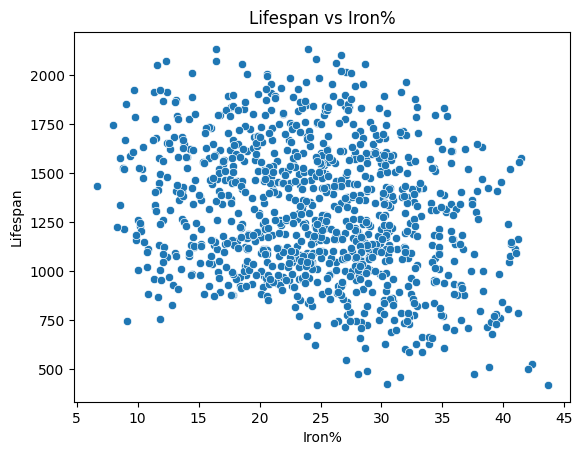

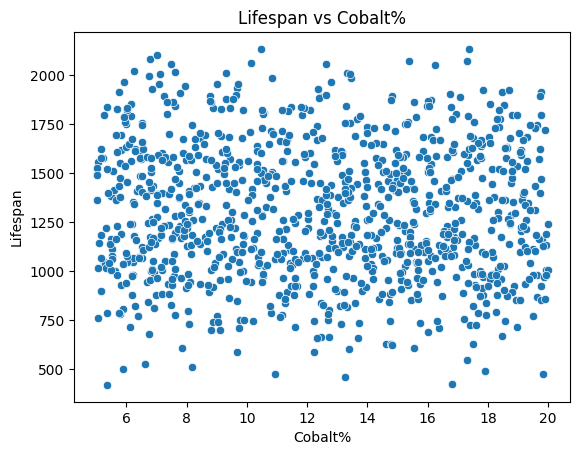

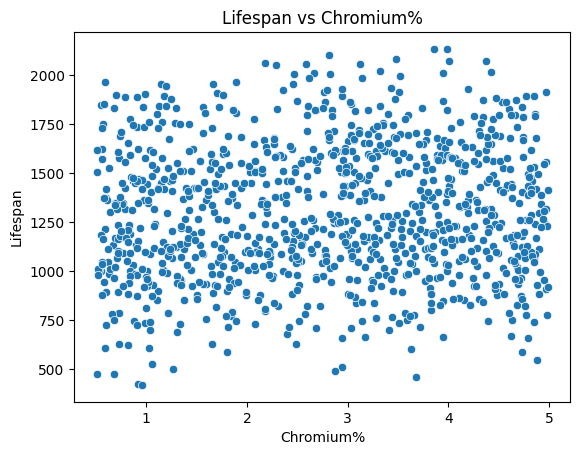

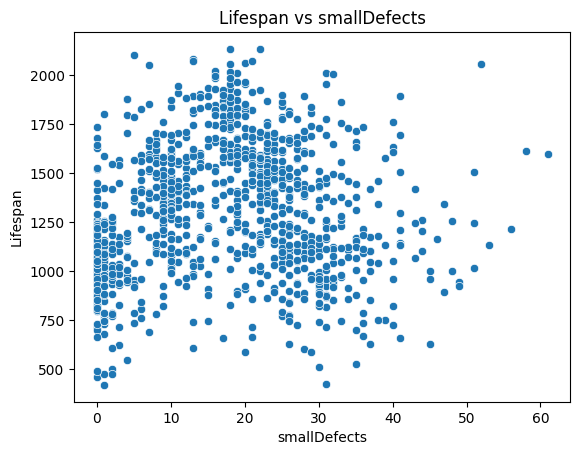

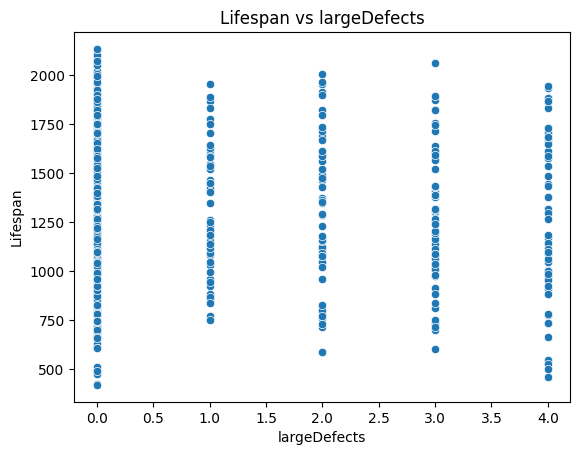

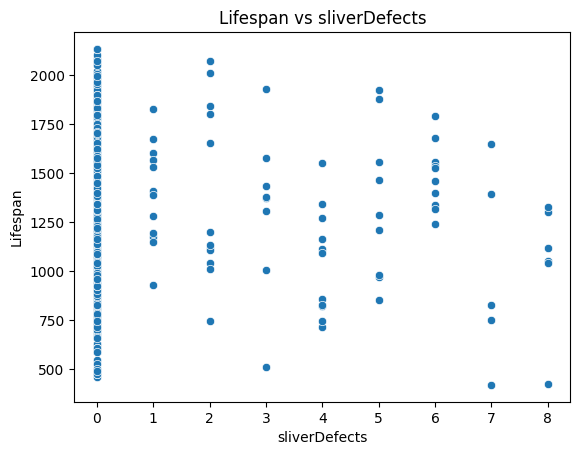

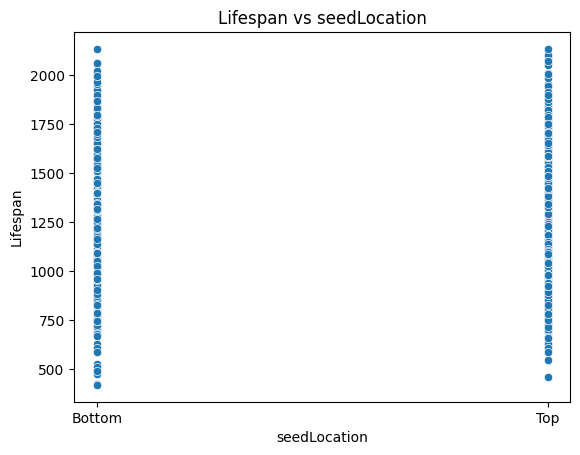

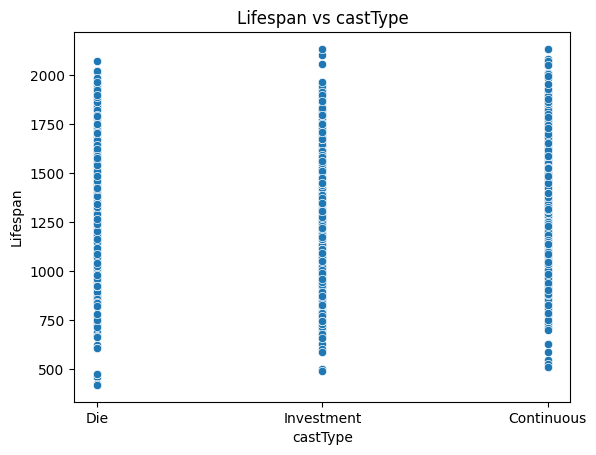

In [39]:
# Exclude the 'lifespan' column from features
feature_cols = [col for col in df.columns if col != 'lifespan']

# Plot scatter plots
for col in feature_cols:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='Lifespan')
    plt.title(f'Lifespan vs {col}')
    plt.show()